In [207]:
import requests
import json
from PIL import Image
import io

In [208]:
URL = "http://127.0.0.1:5000"
response = requests.post(URL)
response.raise_for_status

<bound method Response.raise_for_status of <Response [200]>>

In [209]:
content = json.loads(response.content.decode("utf-8"))
# eSto viene de la pagina del index. Función idex
content

{'Usage': {'URL': '/<filters_available>/', 'http_method': 'POST'},
 'filters_available': ['blur',
  'contour',
  'detail',
  'edge_enhance',
  'edge_enhance_more',
  'emboss',
  'find_edges',
  'sharpen',
  'smooth',
  'smooth_more']}

In [210]:
file = {"image": open("sample.jpg", "rb")}
headers = {"type": "multypart/image"}

In [211]:
filter = content["filters_available"][0]

In [212]:
response = requests.post(f"{URL}/{filter}", headers= headers, files = file)

In [213]:
response.raise_for_status

<bound method Response.raise_for_status of <Response [200]>>

In [214]:
image = Image.open(io.BytesIO(response.content))

In [215]:
image.save(f"filtered_images/response_{filter}.jpg", "JPEG")

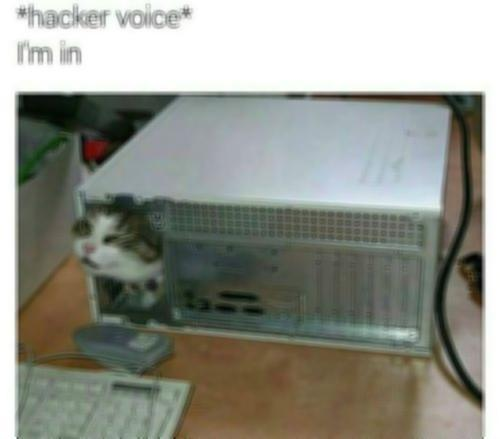

In [216]:
image